In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt

%matplotlib inline

![](data/gradient_decent.png)


목적함수 $f$의 최솟값(minimum)을 찾아가는 알고리즘으로 다음과 같은 방식으로 최솟값을 찾아간다.
 - 초기값 $x_0$을 임의로 설정, 적당한 Learning rate $\alpha$ 설정
 - $n\geq 0$인 정수에 대해서 $x_{n+1}$은 다음과 같이 정의한다.
$$
x_{n+1} := x_n - \alpha \cdot \nabla f(x_n)
$$
 - 주의사항
     - 함수 $f$의 모양이 convex가 아닌 경우 global minimum이 아닌 local minimum으로 $x_n$이 수렴할 가능성이 있다.
     - Learning rate $\alpha$ 값이 큰 경우 최솟값으로 $x_n$이 수렴하는 것이 아니라 발산할 수 있다.
     - Learning rate $\alpha$ 값이 작은 경우 수렴하는 속도가 지나치게 느릴 수 있다.
     
![](data/gradient2.png)

방정식 $2\cdot x = 10$ 의 근을 Gradient Decent를 이용해서 찾아보자.
 - 목적함수 $f(x):=(10-2x)^2$으로 설정하겠다($f$의 최솟값인 0이 되게하는 $x$값이 우리가 원하는 방정식의 근이다).
 - 초기값 $x_0 = 0$, Learning rate $\alpha=0.05$으로 설정
 
$f'(x) = 4(2x-10)$이므로 $x_1$은 다음과 같이 구할 수 있다.
\begin{align}
x_1 &= x_0 -\alpha \cdot f'(x_0)\\
&= 0 - 0.05 \cdot (-40)\\
&=2
\end{align}

그리고 $x_2$는
\begin{align}
x_2 &= x_1 -\alpha \cdot f'(x_1)\\
&= 2 - 0.05 \cdot (-24)\\
&=3.2
\end{align}

반복적으로 이 같은 작업을 반복해서 $x_n$의 수열을 다음과 같이 얻을 수 있다.
$$
(x_n) = (0, 2, 3.2, 3.92, 4.352, 4.6112, ...)
$$

이를 `TensorFlow code`로 작성하면 다음과 같이 작성 할 수 있다.

x_0 = 0.0
x_1 = 2.0
x_2 = 3.2
x_3 = 3.92
x_4 = 4.352
x_5 = 4.6112
x_6 = 4.76672
x_7 = 4.86003
x_8 = 4.91602
x_9 = 4.94961


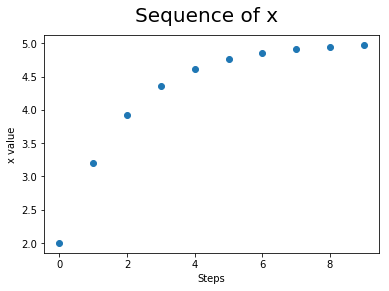

In [2]:
# 방정식 2*x = 10 을 만족하는 x 찾기
# x 초깃값 = 0

X = tf.Variable(0.)
Y = tf.constant(10.)
H = 2 * X


loss = tf.square(H-Y)
optimize = tf.train.GradientDescentOptimizer(0.05).minimize(loss)


sess = tf.Session()
sess.run(tf.global_variables_initializer())
sequence = []

for i in range(10):
    print("x_%i = %s" %(+i, sess.run(X)))
    sess.run(optimize)
    sequence.append(sess.run(X))

plt.suptitle("Sequence of x", fontsize=20)
plt.ylabel("x value")
plt.xlabel("Steps")
_ = plt.plot(sequence, "o")